In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import netCDF4 as nc
import seaborn as sns
import matplotlib.colors as mcolors
import glob
import os
import xarray as xr
import datetime
from salishsea_tools import viz_tools, tidetools, geo_tools, gsw_calls, wind_tools
import pickle
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patches as mpatches
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

%matplotlib inline

In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>

<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [3]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [4]:
grid = nc.Dataset('/data/vdo/MEOPAR/NEMO-forcing/grid/bathymetry_201702.nc')
bathy, X, Y = tidetools.get_bathy_data(grid)

In [5]:
vmax = 1
cmap2 = LinearSegmentedColormap.from_list('mycmap', [(0 / vmax, 'lightskyblue'),
                                                    (0.85 / vmax, 'lightskyblue'),
                                                    (0.850001 / vmax, 'bisque'),
                                                    (1 / vmax, 'bisque')]
                                        )

In [6]:
cmap = LinearSegmentedColormap.from_list('mycmap', [(0 / vmax, 'darkmagenta'), #colour for 1/3
                                                    (0.5 / vmax, 'darkmagenta'),
                                                    (0.50001 / vmax, 'darkorange'), 
                                                    (0.7 / vmax, 'darkorange'),
                                                    (0.70001 / vmax, 'red'),
                                                    (1 / vmax, 'red')]
                                        )

In [7]:
pink_patch = mpatches.Patch(color='darkmagenta', label='1/3 runs')
orange_patch = mpatches.Patch(color='darkorange', label='2/3 runs')
red_patch = mpatches.Patch(color='red', label='3/3 runs')

In [8]:
wind_grid = nc.Dataset('https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSaAtmosphereGridV1')

In [9]:
geo_tools.find_closest_model_point(-123.67, 49.21, wind_grid['longitude'][:]-360, wind_grid['latitude'][:],
                                   grid = 'GEM2.5')

(143, 141)

In [10]:
geo_tools.find_closest_model_point(-123.67, 49.21, X, Y)

(474, 252)

In [11]:
wind_data = xr.open_dataset('https://salishsea.eos.ubc.ca/erddap/griddap/ubcSSaSurfaceAtmosphereFieldsV1')

In [12]:
time_slice1 = slice('2016-05-01 00:00:00', '2016-05-11 00:00:00')
time_slice2 = slice('2017-08-02 00:00:00', '2017-08-12 00:00:00')
time_slice3 = slice('2017-05-08 00:00:00', '2017-05-18 00:00:00')
time_slice4 = slice('2017-11-10 00:00:00', '2017-11-20 00:00:00')

In [13]:
Yind = 143
Xind = 141

u_winds1 = wind_data.u_wind.isel(gridY=Yind, gridX=Xind).sel(time=time_slice1).data
v_winds1 = wind_data.v_wind.isel(gridY=Yind, gridX=Xind).sel(time=time_slice1).data

u_winds2 = wind_data.u_wind.isel(gridY=Yind, gridX=Xind).sel(time=time_slice2).data
v_winds2 = wind_data.v_wind.isel(gridY=Yind, gridX=Xind).sel(time=time_slice2).data

u_winds3 = wind_data.u_wind.isel(gridY=Yind, gridX=Xind).sel(time=time_slice3).data
v_winds3 = wind_data.v_wind.isel(gridY=Yind, gridX=Xind).sel(time=time_slice3).data

u_winds4 = wind_data.u_wind.isel(gridY=Yind, gridX=Xind).sel(time=time_slice4).data
v_winds4 = wind_data.v_wind.isel(gridY=Yind, gridX=Xind).sel(time=time_slice4).data

In [14]:
wind_speed1, wind_dir1 = wind_tools.wind_speed_dir(u_winds1, v_winds1)
wind_speed2, wind_dir2 = wind_tools.wind_speed_dir(u_winds2, v_winds2)
wind_speed3, wind_dir3 = wind_tools.wind_speed_dir(u_winds3, v_winds3)
wind_speed4, wind_dir4 = wind_tools.wind_speed_dir(u_winds4, v_winds4)

In [15]:
high350 = nc.Dataset('/ocean/vdo/MIDOSS/results/fakewinds/SOG/Lagrangian_AKNS_crude_fakewinds_04may16.nc')
low350 = nc.Dataset('/ocean/vdo/MIDOSS/results/fakewinds/SOG/Lagrangian_AKNS_crude_fakewinds_05aug17.nc')
low150 = nc.Dataset('/ocean/vdo/MIDOSS/results/fakewinds/SOG/Lagrangian_AKNS_crude_fakewinds_11may17.nc')
high150 = nc.Dataset('/ocean/vdo/MIDOSS/results/fakewinds/SOG/Lagrangian_AKNS_crude_fakewinds_13nov17.nc')
zero = nc.Dataset('/ocean/vdo/MIDOSS/results/fakewinds/zerowinds/Lagrangian_AKNS_crude_fakewinds_zerowinds_SOG.nc')

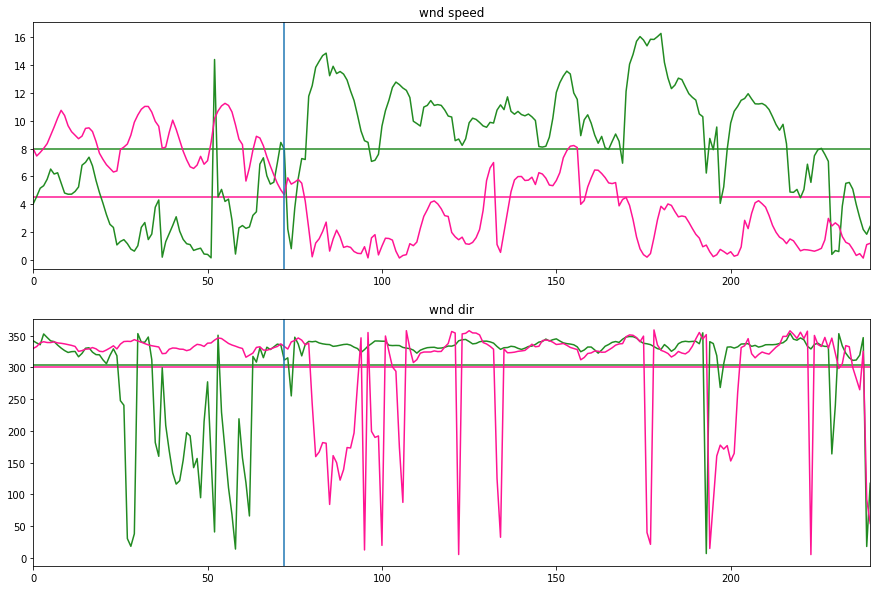

In [16]:
fig, ax = plt.subplots(2,1, figsize = (15,10))

ax[0].plot(wind_speed1, color = 'forestgreen')
ax[0].plot(wind_speed2, color = 'deeppink')
ax[0].set_title('wnd speed')
ax[0].hlines(wind_speed1.mean(), 0, 240, color = 'forestgreen')
ax[0].hlines(wind_speed2.mean(), 0, 240, color = 'deeppink')

ax[1].plot(wind_dir1, color = 'forestgreen')
ax[1].plot(wind_dir2, color = 'deeppink')
ax[1].set_title('wnd dir')
ax[1].hlines(wind_dir1.mean(), 0, 240, color = 'forestgreen')
ax[1].hlines(wind_dir2.mean(), 0, 240, color = 'deeppink')

for a in ax:
    a.axvline(x=72)
    a.set_xlim(0, 240);

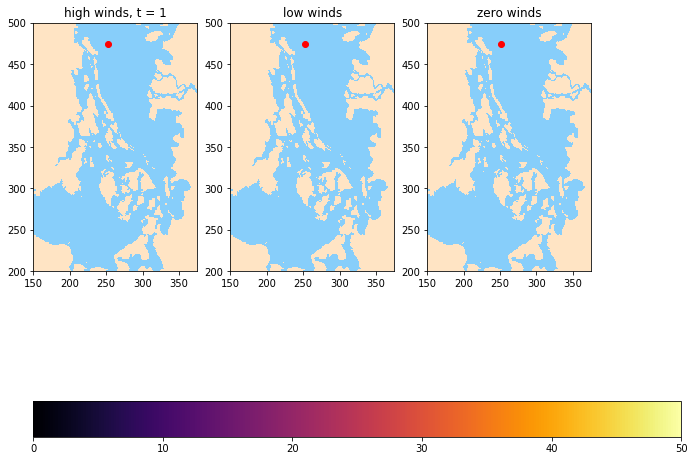

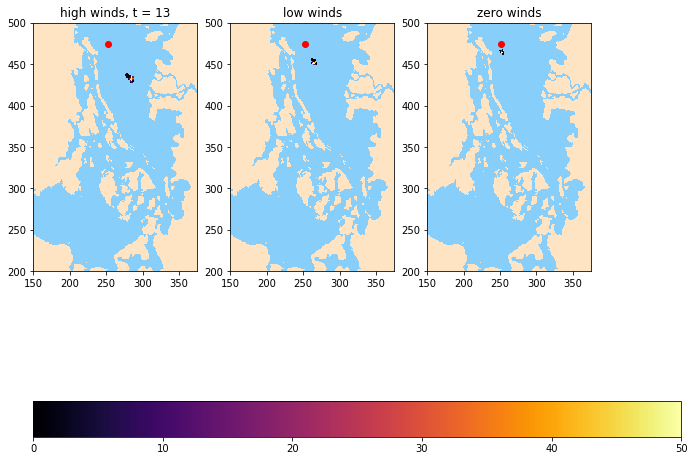

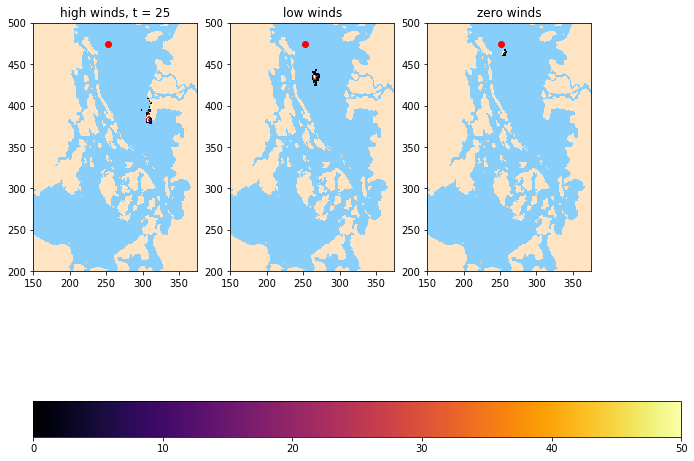

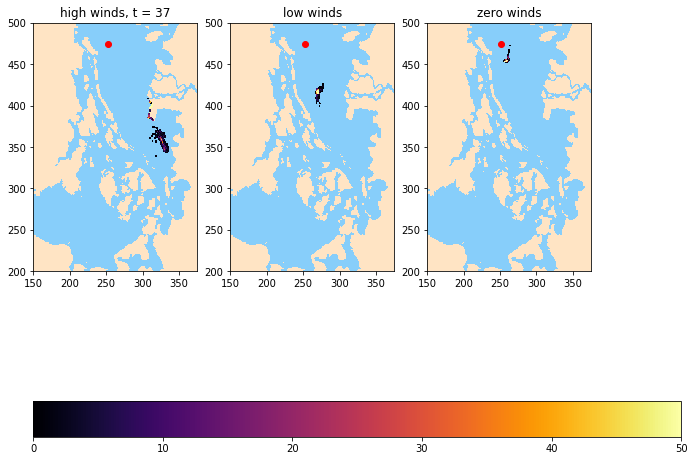

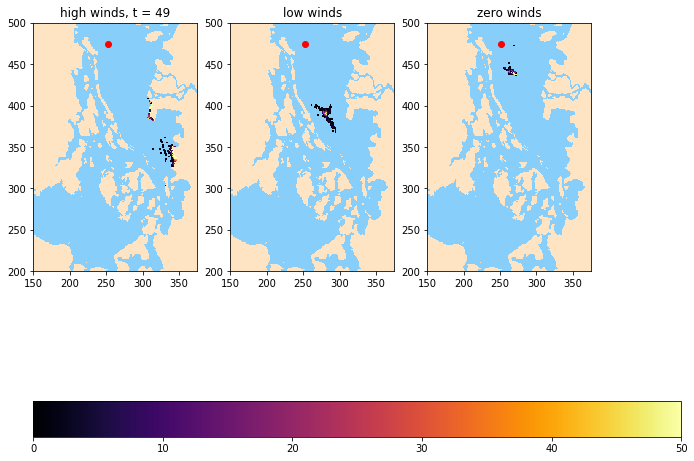

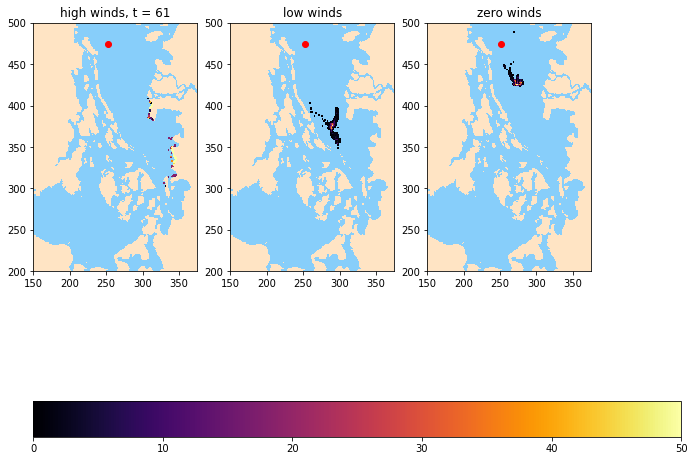

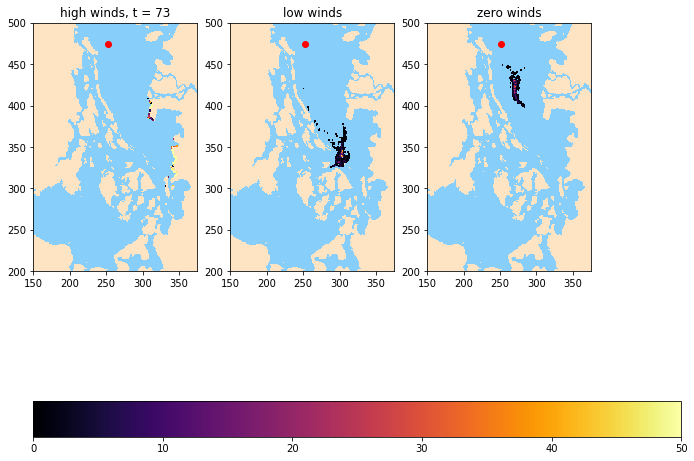

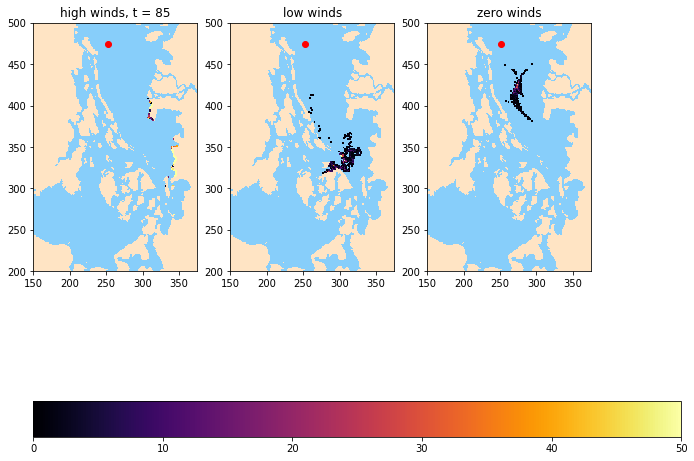

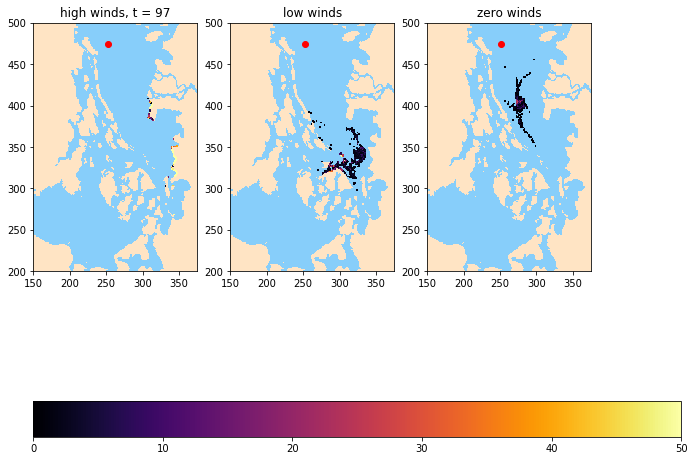

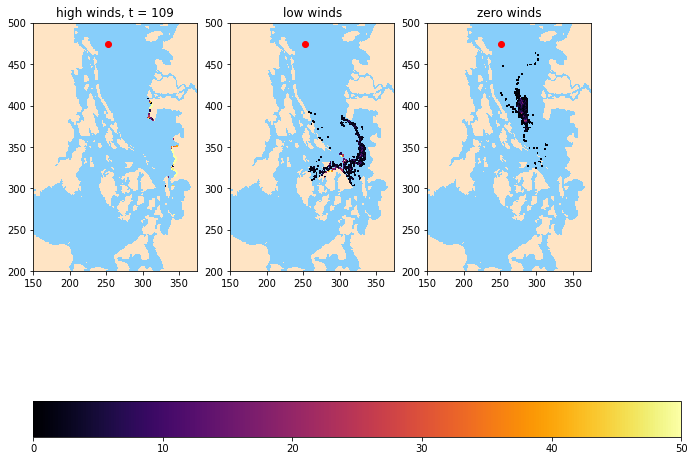

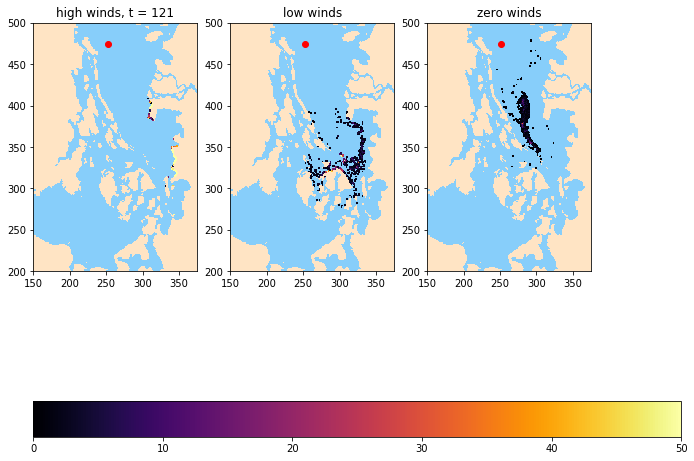

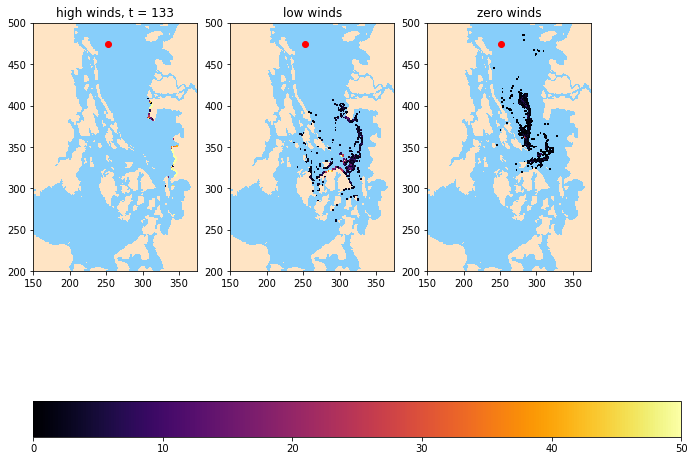

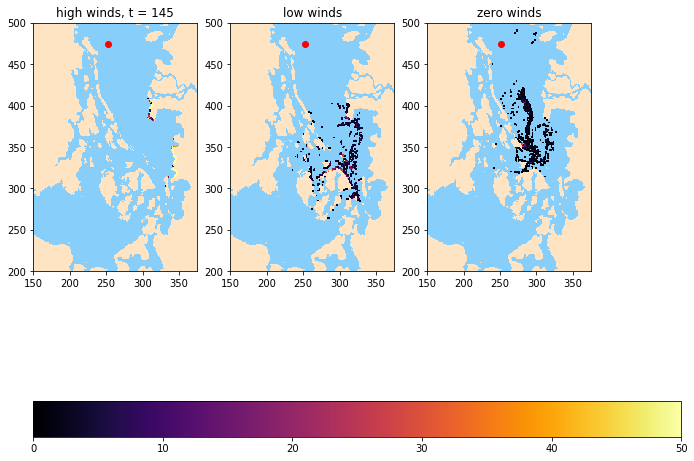

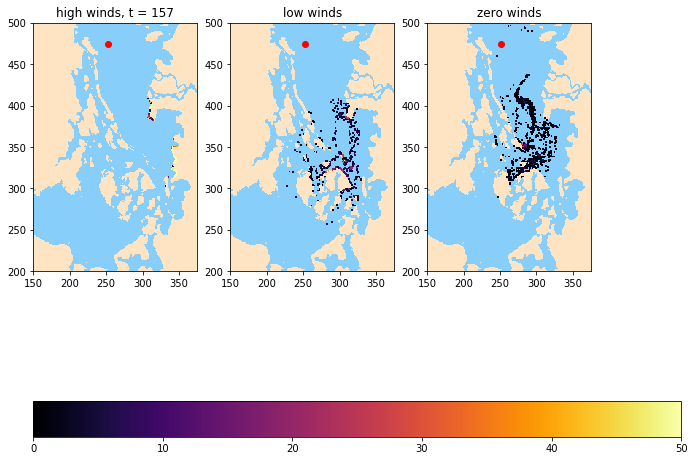

In [17]:
for t in np.arange(1, 168, 12):
    fig, ax = plt.subplots(1,3, figsize = (10,10))
    for a in ax:
        a.pcolormesh(bathy.mask[1:-1, 1:-1], cmap = cmap2)
    ax[0].set_title("high winds, t = " + str(t))
    ax[1].set_title("low winds")
    ax[2].set_title("zero winds")
    ax[0].pcolormesh(np.ma.masked_equal(high350['Thickness_2D'][t, :,:], 0), vmin = 0, vmax = 50, cmap = 'inferno')
    mesh = ax[1].pcolormesh(np.ma.masked_equal(low350['Thickness_2D'][t, :,:], 0), vmin = 0, vmax = 50, cmap = 'inferno')
    ax[2].pcolormesh(np.ma.masked_equal(zero['Thickness_2D'][t, :,:], 0), vmin = 0, vmax = 50, cmap = 'inferno')
    for a in ax:
        a.plot(252,474, 'ro')
        viz_tools.set_aspect(a)
        a.set_xlim(150,375)
        a.set_ylim(200, 500)
    p0 = ax[0].get_position().get_points().flatten()
    p1 = ax[1].get_position().get_points().flatten()
    p2 = ax[2].get_position().get_points().flatten()

    ax_cbar = fig.add_axes([p0[0], 0.1, p2[2], 0.05]) 
    cbar = plt.colorbar(mesh, cax=ax_cbar, orientation='horizontal')

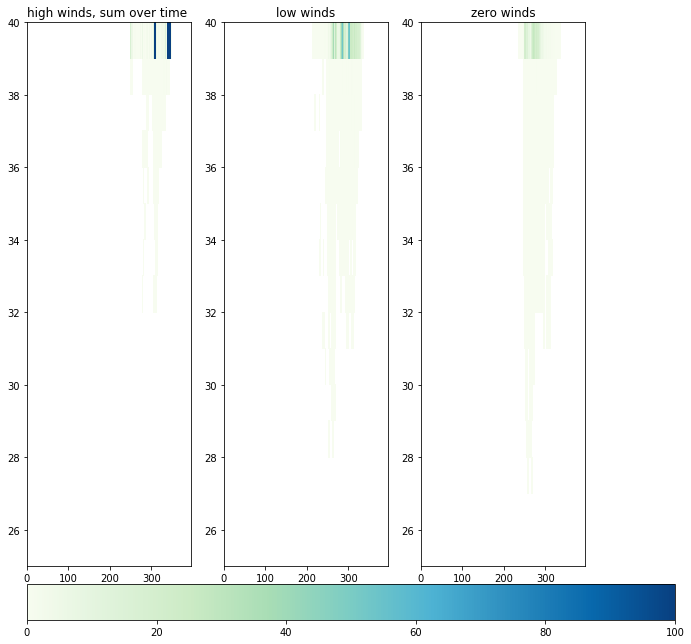

In [18]:
fig, ax = plt.subplots(1,3, figsize = (10,10))
ax[0].set_title("high winds, sum over time ")
ax[1].set_title("low winds")
ax[2].set_title("zero winds")
ax[0].pcolormesh(np.ma.masked_equal(np.sum(high350['OilConcentration_3D'][ :,:], axis=(0,2)), 0),
                 vmin = 0, vmax = 100, cmap = 'GnBu')
mesh = ax[1].pcolormesh(np.ma.masked_equal(np.sum(low350['OilConcentration_3D'][ :,:], axis=(0,2)), 0),
                        vmin = 0, vmax = 100, cmap = 'GnBu')
ax[2].pcolormesh(np.ma.masked_equal(np.sum(zero['OilConcentration_3D'][ :,:], axis=(0,2)), 0),
                        vmin = 0, vmax = 100, cmap = 'GnBu')
for a in ax:
    #a.plot(252,474, 'ro')
    #viz_tools.set_aspect(a)
    #a.set_xlim(150,375)
    a.set_ylim(25, 40)
p0 = ax[0].get_position().get_points().flatten()
p1 = ax[1].get_position().get_points().flatten()
p2 = ax[2].get_position().get_points().flatten()

ax_cbar = fig.add_axes([p0[0], 0.05, p2[2], 0.05]) 
cbar = plt.colorbar(mesh, cax=ax_cbar, orientation='horizontal')

In [19]:
f0 = high350
f1 = low350
f2 = zero

f0lessthanone = f0['Beaching_Time'][:,:]
f0lessthanone[(f0lessthanone <= 24) & (f0lessthanone > 0)] = 1
f0lessthanone[(f0lessthanone > 24) | (f0lessthanone == 0)] = 0

f1lessthanone = f1['Beaching_Time'][:,:]
f1lessthanone[(f1lessthanone <= 24) & (f1lessthanone > 0)] = 1
f1lessthanone[(f1lessthanone > 24) | (f1lessthanone == 0)] = 0

f2lessthanone = f2['Beaching_Time'][:,:]
f2lessthanone[(f2lessthanone <= 24) & (f2lessthanone > 0)] = 1
f2lessthanone[(f2lessthanone > 24) | (f2lessthanone == 0)] = 0


problessthanone = (f0lessthanone+f1lessthanone + f2lessthanone)/3

f0lessthanthree = f0['Beaching_Time'][:,:]
f0lessthanthree[(f0lessthanthree <= 72) & (f0lessthanthree > 0)] = 1
f0lessthanthree[(f0lessthanthree > 72) | (f0lessthanthree == 0)] = 0

f1lessthanthree = f1['Beaching_Time'][:,:]
f1lessthanthree[(f1lessthanthree <= 72) & (f1lessthanthree > 0)] = 1
f1lessthanthree[(f1lessthanthree > 72) | (f1lessthanthree == 0)] = 0

f2lessthanthree = f2['Beaching_Time'][:,:]
f2lessthanthree[(f2lessthanthree <= 72) & (f2lessthanthree > 0)] = 1
f2lessthanthree[(f2lessthanthree > 72) | (f2lessthanthree == 0)] = 0


problessthanthree = (f0lessthanthree+f1lessthanthree+f2lessthanthree)/3

f0lessthanseven = f0['Beaching_Time'][:,:]
f0lessthanseven[(f0lessthanseven <= 168) & (f0lessthanseven > 0)] = 1
f0lessthanseven[(f0lessthanseven > 168) | (f0lessthanseven == 0)] = 0

f1lessthanseven = f1['Beaching_Time'][:,:]
f1lessthanseven[(f1lessthanseven <= 168) & (f1lessthanseven > 0)] = 1
f1lessthanseven[(f1lessthanseven > 168) | (f1lessthanseven == 0)] = 0

f2lessthanseven = f2['Beaching_Time'][:,:]
f2lessthanseven[(f2lessthanseven <= 168) & (f2lessthanseven > 0)] = 1
f2lessthanseven[(f2lessthanseven > 168) | (f2lessthanseven == 0)] = 0

problessthanseven = (f0lessthanseven+f1lessthanseven+f2lessthanseven)/3

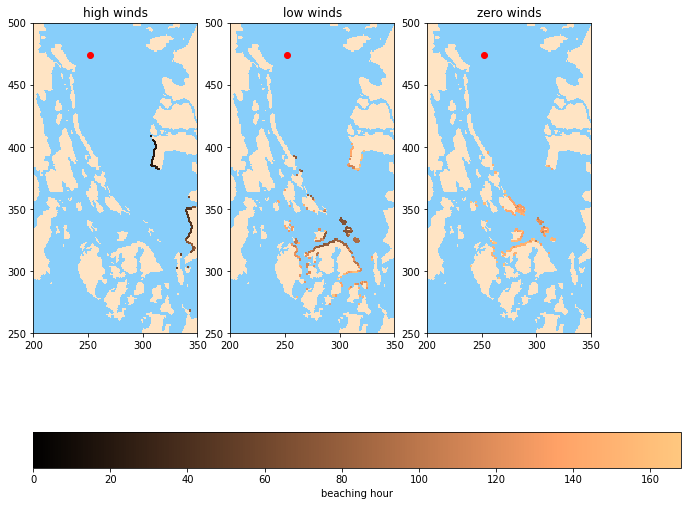

In [20]:
fig, ax = plt.subplots(1,3, figsize = (10,10))
for a in ax:
    a.pcolormesh(bathy.mask[1:-1, 1:-1], cmap = cmap2)
ax[0].set_title("high winds")
ax[1].set_title("low winds")
ax[2].set_title("zero winds")
ax[0].pcolormesh(np.ma.masked_equal(high350['Beaching_Time'][:,:], 0), vmin = 0, vmax = 168, cmap = 'copper')
mesh = ax[1].pcolormesh(np.ma.masked_equal(low350['Beaching_Time'][:,:], 0), vmin = 0, vmax = 168, cmap = 'copper')
ax[2].pcolormesh(np.ma.masked_equal(zero['Beaching_Time'][:,:], 0), vmin = 0, vmax = 168, cmap = 'copper')
for a in ax:
    a.plot(252,474, 'ro')
    viz_tools.set_aspect(a)
    a.set_xlim(200,350)
    a.set_ylim(250, 500)
p0 = ax[0].get_position().get_points().flatten()
p1 = ax[1].get_position().get_points().flatten()
p2 = ax[2].get_position().get_points().flatten()

ax_cbar = fig.add_axes([p0[0], 0.1, p2[2], 0.05]) 
cbar = plt.colorbar(mesh, cax=ax_cbar, orientation='horizontal')
cbar.set_label('beaching hour');

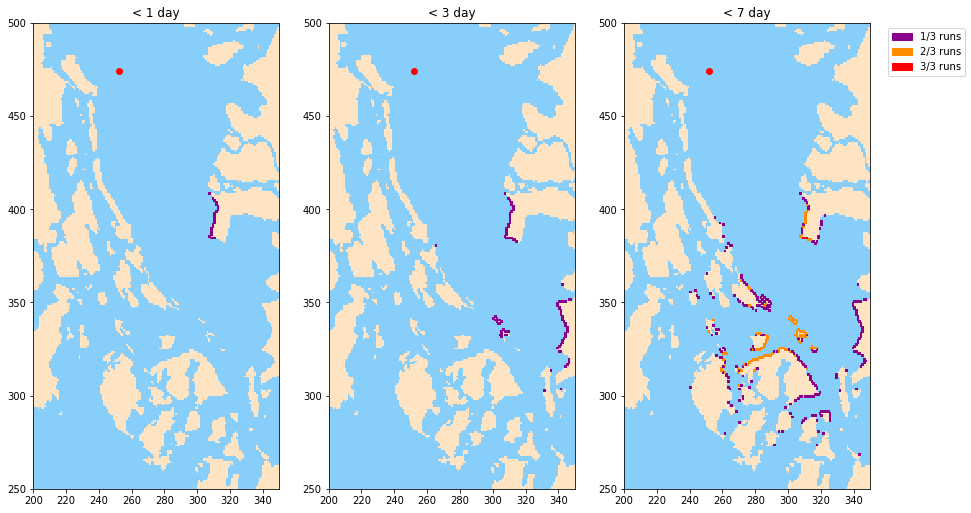

In [21]:
fig, ax = plt.subplots(1,3, figsize = (15,15))

for a in ax:
    a.pcolormesh(bathy.mask[1:-1, 1:-1], cmap = cmap2)

ax[0].pcolormesh(np.ma.masked_equal(problessthanone,0), vmin = 0, vmax = 1, cmap = cmap)
ax[1].pcolormesh(np.ma.masked_equal(problessthanthree,0), vmin = 0, vmax = 1, cmap = cmap)
ax[2].pcolormesh(np.ma.masked_equal(problessthanseven,0), vmin = 0, vmax = 1, cmap = cmap)

ax[0].set_title('< 1 day')
ax[1].set_title('< 3 day')
ax[2].set_title('< 7 day')

plt.legend(handles=[pink_patch, orange_patch, red_patch], 
       bbox_to_anchor=(1.05, 1), loc='upper left')

for a in ax:
    a.plot(252,474, 'ro')
    viz_tools.set_aspect(a)
    a.set_xlim(200,350)
    a.set_ylim(250, 500);

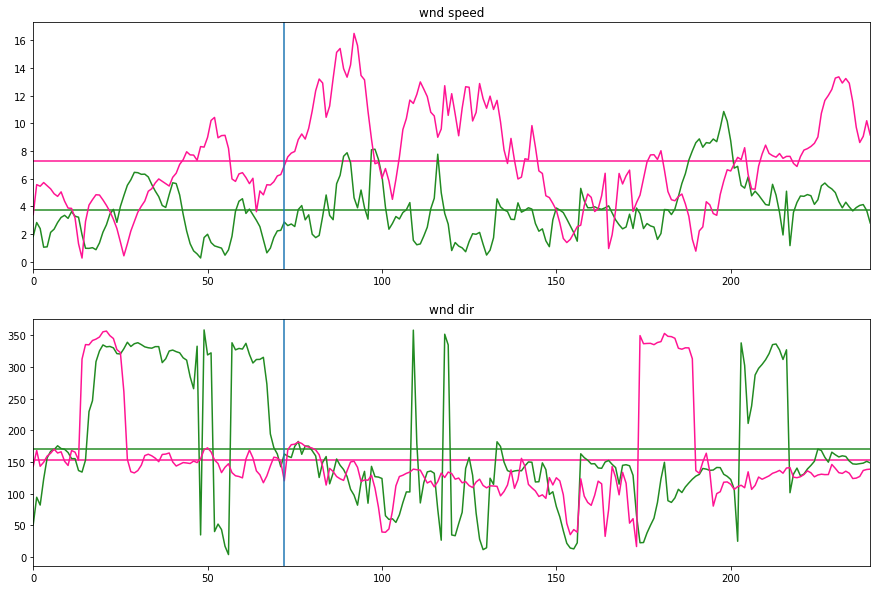

In [22]:
fig, ax = plt.subplots(2,1, figsize = (15,10))

ax[0].plot(wind_speed3, color = 'forestgreen')
ax[0].plot(wind_speed4, color = 'deeppink')
ax[0].set_title('wnd speed')
ax[0].hlines(wind_speed3.mean(), 0, 240, color = 'forestgreen')
ax[0].hlines(wind_speed4.mean(), 0, 240, color = 'deeppink')

ax[1].plot(wind_dir3, color = 'forestgreen')
ax[1].plot(wind_dir4, color = 'deeppink')
ax[1].set_title('wnd dir')
ax[1].hlines(wind_dir3.mean(), 0, 240, color = 'forestgreen')
ax[1].hlines(wind_dir4.mean(), 0, 240, color = 'deeppink')

for a in ax:
    a.axvline(x=72)
    a.set_xlim(0, 240);

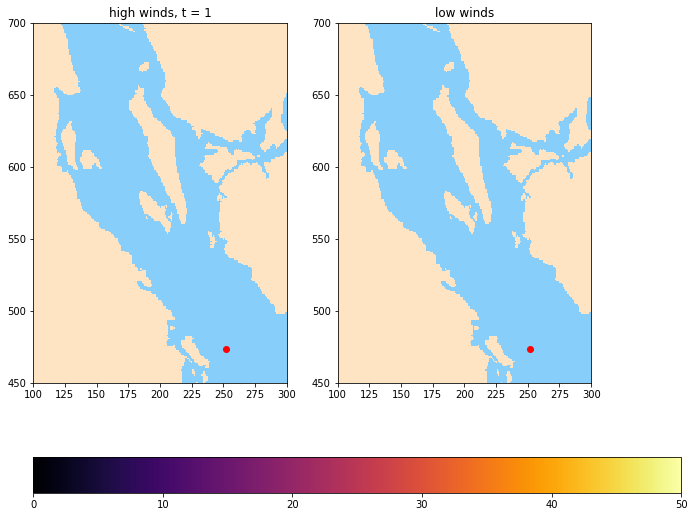

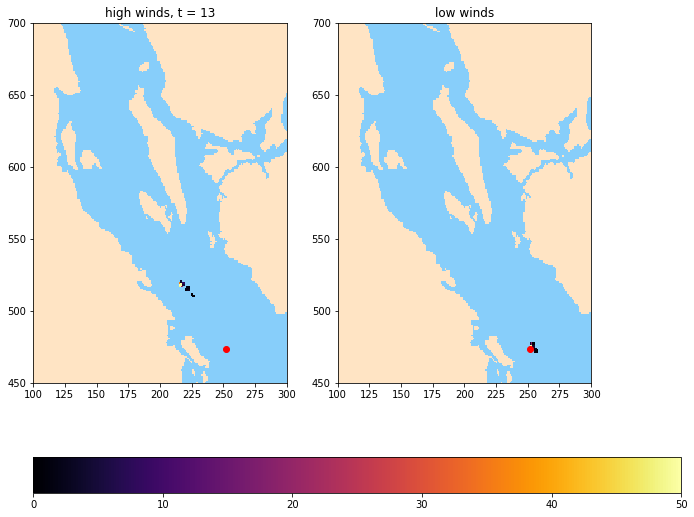

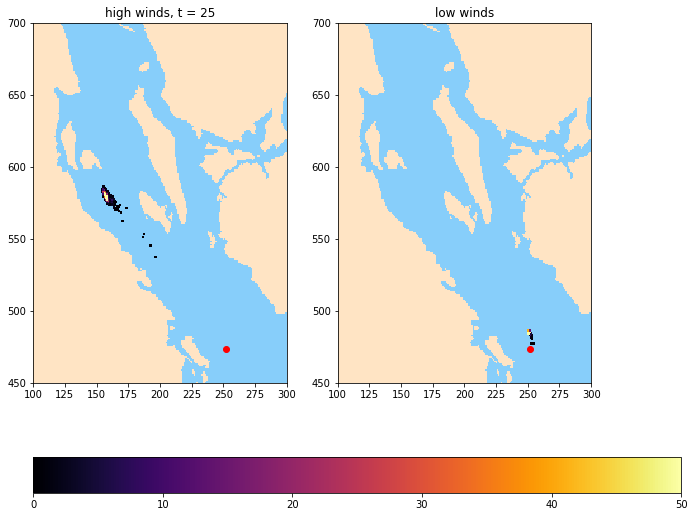

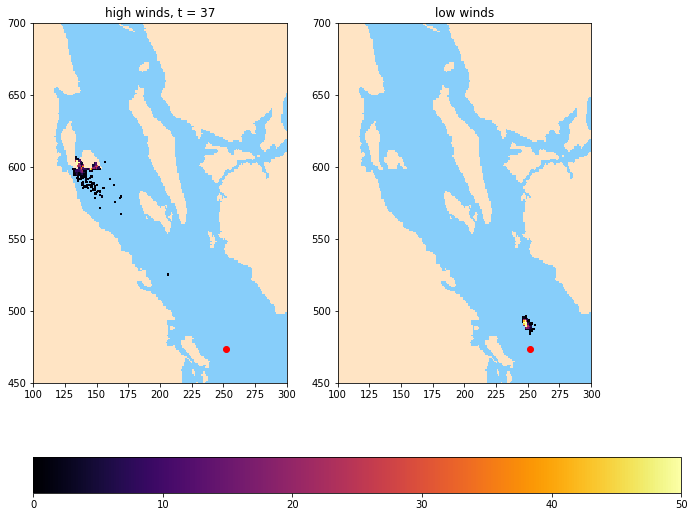

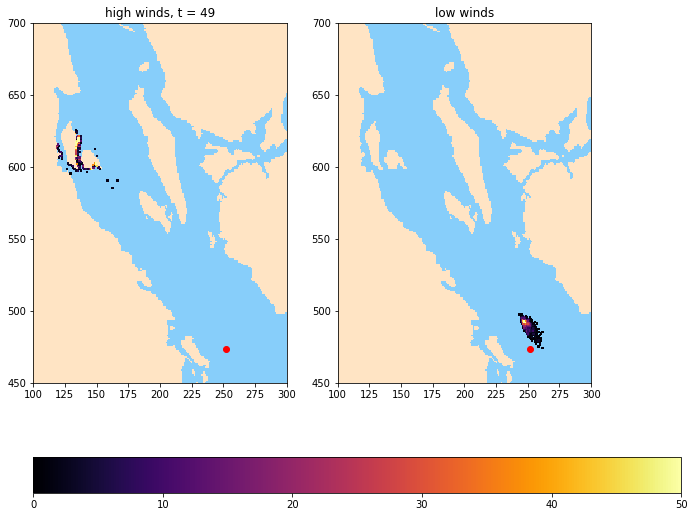

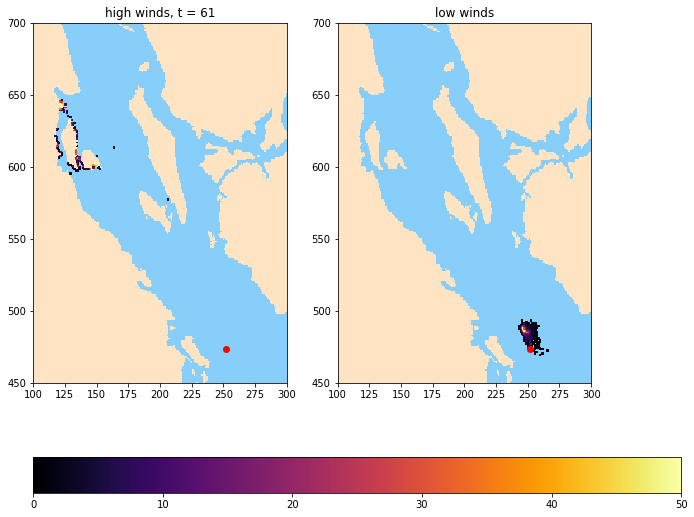

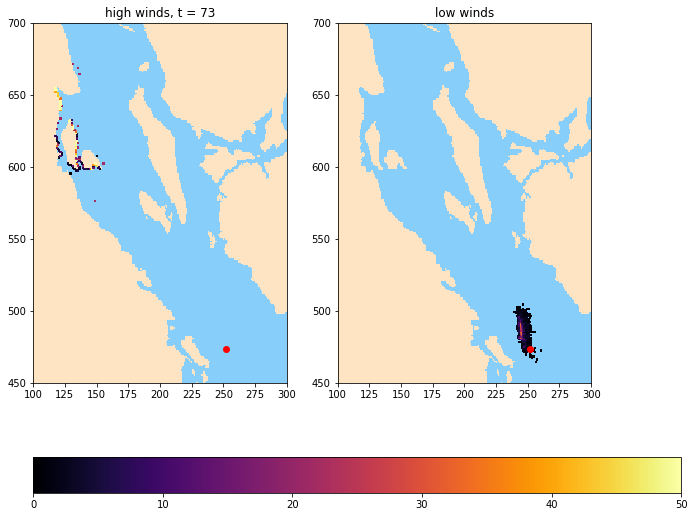

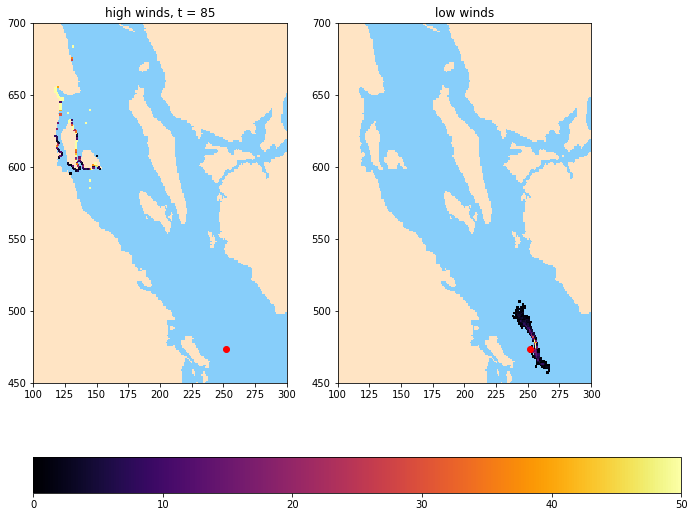

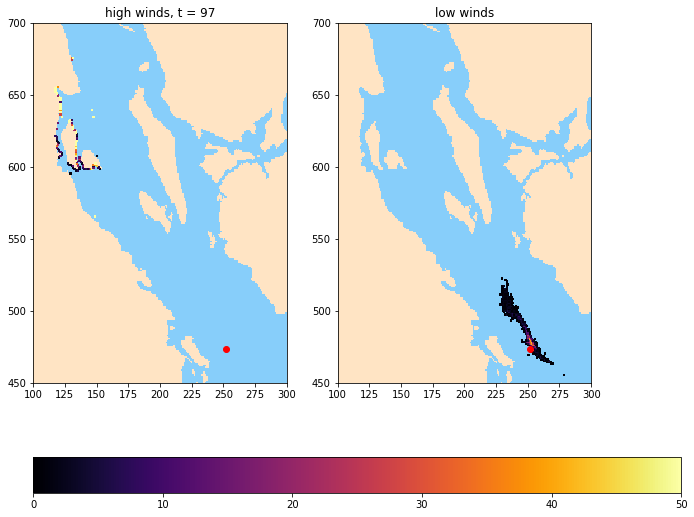

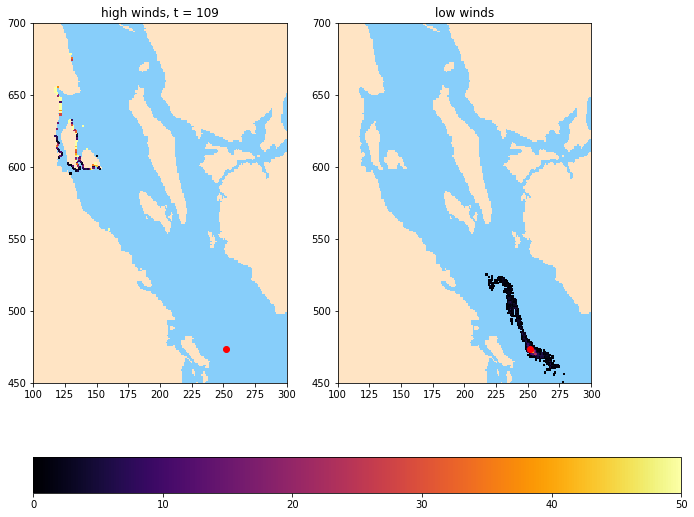

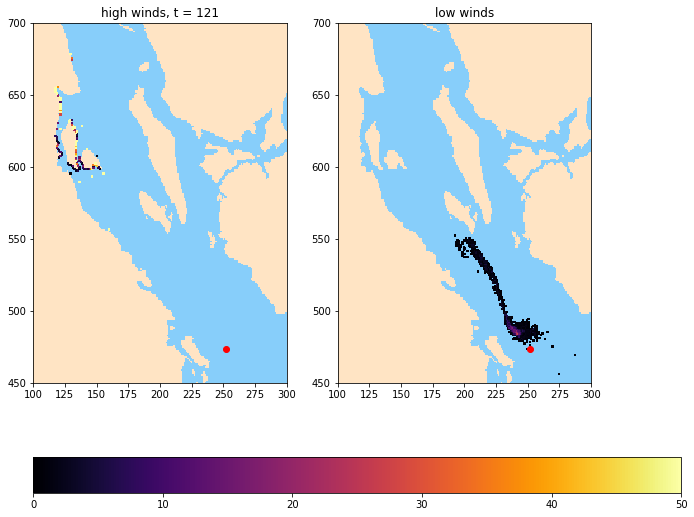

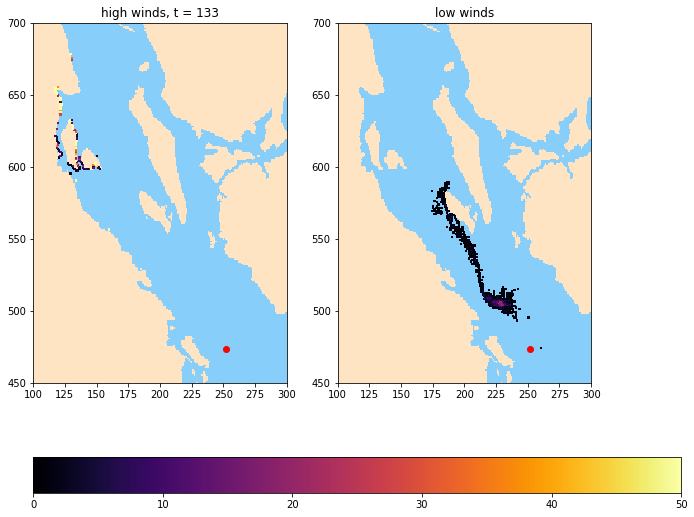

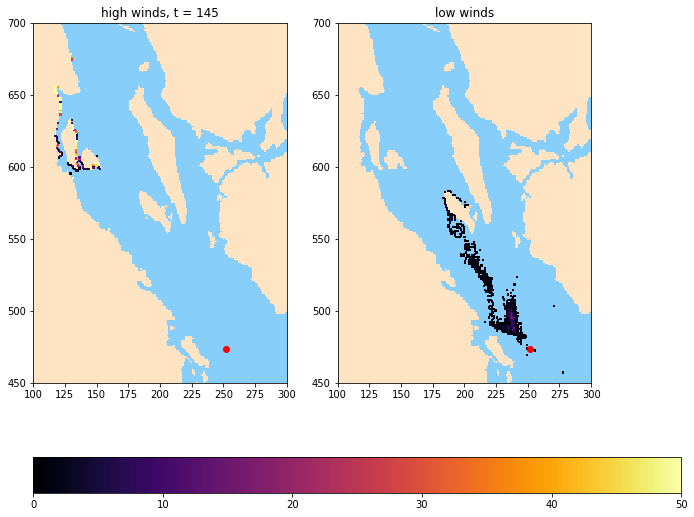

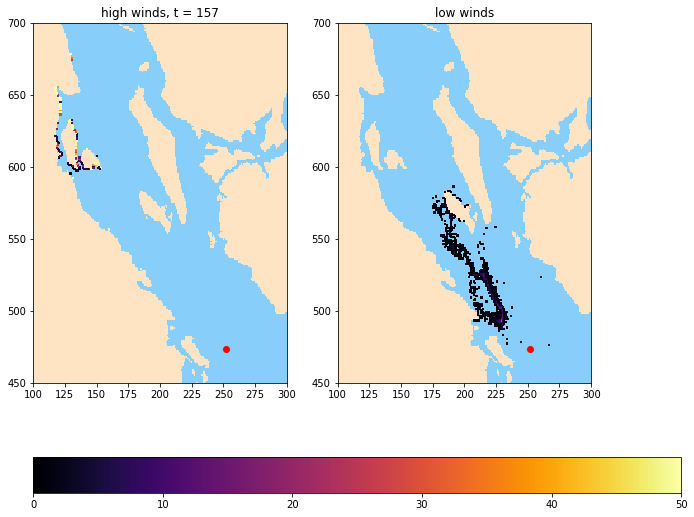

In [23]:
for t in np.arange(1, 168, 12):
    fig, ax = plt.subplots(1,2, figsize = (10,10))
    for a in ax:
        a.pcolormesh(bathy.mask[1:-1, 1:-1], cmap = cmap2)
    ax[0].set_title("high winds, t = " + str(t))
    ax[1].set_title("low winds")
    ax[0].pcolormesh(np.ma.masked_equal(high150['Thickness_2D'][t, :,:], 0), vmin = 0, vmax = 50, cmap = 'inferno')
    mesh = ax[1].pcolormesh(np.ma.masked_equal(low150['Thickness_2D'][t, :,:], 0), vmin = 0, vmax = 50, cmap = 'inferno')
    for a in ax:
        a.plot(252,474, 'ro')
        viz_tools.set_aspect(a)
        a.set_xlim(100,300)
        a.set_ylim(450, 700)
    p0 = ax[0].get_position().get_points().flatten()
    p1 = ax[1].get_position().get_points().flatten()

    ax_cbar = fig.add_axes([p0[0], 0.1, p1[2], 0.05]) 
    cbar = plt.colorbar(mesh, cax=ax_cbar, orientation='horizontal')

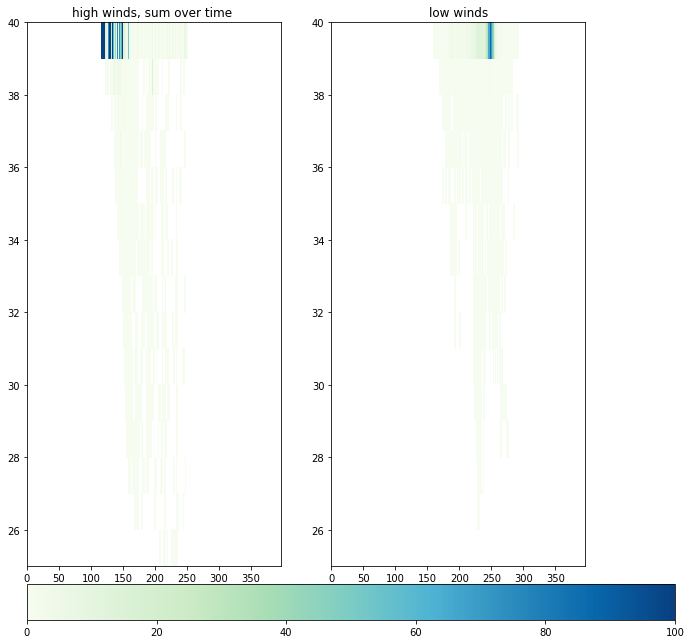

In [24]:
fig, ax = plt.subplots(1,2, figsize = (10,10))
ax[0].set_title("high winds, sum over time ")
ax[1].set_title("low winds")
ax[0].pcolormesh(np.ma.masked_equal(np.sum(high150['OilConcentration_3D'][ :,:], axis=(0,2)), 0),
                 vmin = 0, vmax = 100, cmap = 'GnBu')
mesh = ax[1].pcolormesh(np.ma.masked_equal(np.sum(low150['OilConcentration_3D'][ :,:], axis=(0,2)), 0),
                        vmin = 0, vmax = 100, cmap = 'GnBu')
for a in ax:
    #a.plot(252,474, 'ro')
    #viz_tools.set_aspect(a)
    #a.set_xlim(150,375)
    a.set_ylim(25, 40)
p0 = ax[0].get_position().get_points().flatten()
p1 = ax[1].get_position().get_points().flatten()

ax_cbar = fig.add_axes([p0[0], 0.05, p1[2], 0.05]) 
cbar = plt.colorbar(mesh, cax=ax_cbar, orientation='horizontal')

In [25]:
f0 = high150
f1 = low150

f0lessthanone = f0['Beaching_Time'][:,:]
f0lessthanone[(f0lessthanone <= 24) & (f0lessthanone > 0)] = 1
f0lessthanone[(f0lessthanone > 24) | (f0lessthanone == 0)] = 0

f1lessthanone = f1['Beaching_Time'][:,:]
f1lessthanone[(f1lessthanone <= 24) & (f1lessthanone > 0)] = 1
f1lessthanone[(f1lessthanone > 24) | (f1lessthanone == 0)] = 0


problessthanone = (f0lessthanone+f1lessthanone)/2

f0lessthanthree = f0['Beaching_Time'][:,:]
f0lessthanthree[(f0lessthanthree <= 72) & (f0lessthanthree > 0)] = 1
f0lessthanthree[(f0lessthanthree > 72) | (f0lessthanthree == 0)] = 0

f1lessthanthree = f1['Beaching_Time'][:,:]
f1lessthanthree[(f1lessthanthree <= 72) & (f1lessthanthree > 0)] = 1
f1lessthanthree[(f1lessthanthree > 72) | (f1lessthanthree == 0)] = 0


problessthanthree = (f0lessthanthree+f1lessthanthree)/2

f0lessthanseven = f0['Beaching_Time'][:,:]
f0lessthanseven[(f0lessthanseven <= 168) & (f0lessthanseven > 0)] = 1
f0lessthanseven[(f0lessthanseven > 168) | (f0lessthanseven == 0)] = 0

f1lessthanseven = f1['Beaching_Time'][:,:]
f1lessthanseven[(f1lessthanseven <= 168) & (f1lessthanseven > 0)] = 1
f1lessthanseven[(f1lessthanseven > 168) | (f1lessthanseven == 0)] = 0

problessthanseven = (f0lessthanseven+f1lessthanseven)/2

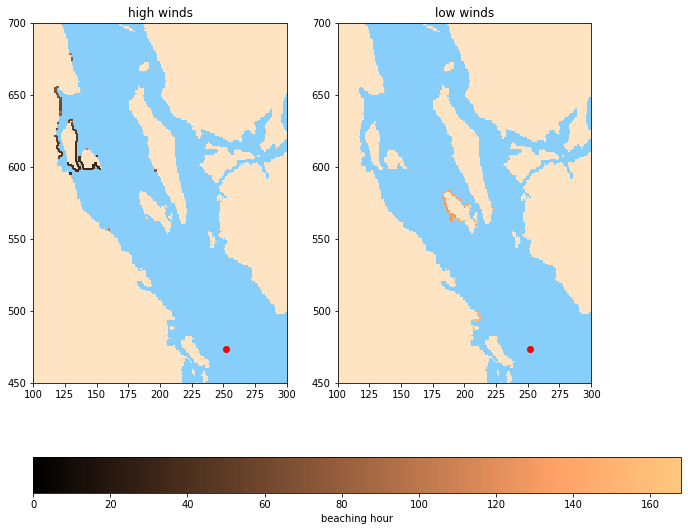

In [26]:
fig, ax = plt.subplots(1,2, figsize = (10,10))
for a in ax:
    a.pcolormesh(bathy.mask[1:-1, 1:-1], cmap = cmap2)
ax[0].set_title("high winds")
ax[1].set_title("low winds")
ax[0].pcolormesh(np.ma.masked_equal(high150['Beaching_Time'][:,:], 0), vmin = 0, vmax = 168, cmap = 'copper')
mesh = ax[1].pcolormesh(np.ma.masked_equal(low150['Beaching_Time'][:,:], 0), vmin = 0, vmax = 168, cmap = 'copper')
for a in ax:
    a.plot(252,474, 'ro')
    viz_tools.set_aspect(a)
    a.set_xlim(100,300)
    a.set_ylim(450, 700)

p0 = ax[0].get_position().get_points().flatten()
p1 = ax[1].get_position().get_points().flatten()

ax_cbar = fig.add_axes([p0[0], 0.1, p1[2], 0.05]) 
cbar = plt.colorbar(mesh, cax=ax_cbar, orientation='horizontal')
cbar.set_label('beaching hour');

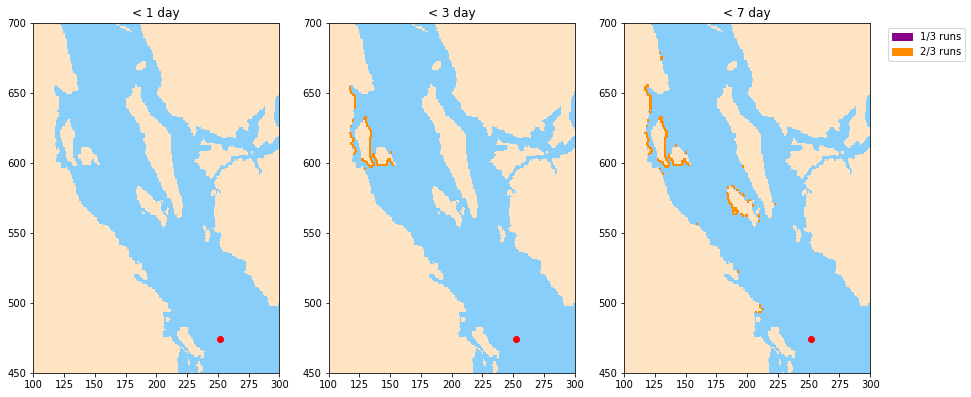

In [27]:
fig, ax = plt.subplots(1,3, figsize = (15,15))

for a in ax:
    a.pcolormesh(bathy.mask[1:-1, 1:-1], cmap = cmap2)

ax[0].pcolormesh(np.ma.masked_equal(problessthanone,0), vmin = 0, vmax = 1, cmap = cmap)
ax[1].pcolormesh(np.ma.masked_equal(problessthanthree,0), vmin = 0, vmax = 1, cmap = cmap)
ax[2].pcolormesh(np.ma.masked_equal(problessthanseven,0), vmin = 0, vmax = 1, cmap = cmap)

ax[0].set_title('< 1 day')
ax[1].set_title('< 3 day')
ax[2].set_title('< 7 day')

plt.legend(handles=[pink_patch, orange_patch], 
       bbox_to_anchor=(1.05, 1), loc='upper left')

for a in ax:
    a.plot(252,474, 'ro')
    viz_tools.set_aspect(a)
    a.set_xlim(100,300)
    a.set_ylim(450, 700);